Problem Statement:

Implement depth first search algorithm, Use an undirected 
graph and develop a recursive algorithm for searching all the vertices of a graph or tree data 
structure.

In [1]:
# Cell 1: Import necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

In [2]:
# Cell 2: Create a tree-like undirected graph
def create_tree():
    # This is an undirected tree structure
    # Each node connects to its parent and children
    tree = {
        'A': ['B', 'C', 'D'],  # Root node with 3 children
        'B': ['A', 'E', 'F'],  # B connects to parent A and children E, F
        'C': ['A', 'G'],       # C connects to parent A and child G
        'D': ['A', 'H', 'I'],  # D connects to parent A and children H, I
        'E': ['B'],            # E connects to parent B
        'F': ['B'],            # F connects to parent B
        'G': ['C'],            # G connects to parent C
        'H': ['D'],            # H connects to parent D
        'I': ['D']             # I connects to parent D
    }
    return tree

In [3]:
# Cell 3: Function to visualize the tree with hierarchical layout
def visualize_tree(tree, visited=None, current=None, title="Tree"):
    """Draw the tree with optional highlighting for visited nodes and current node"""
    # Create a NetworkX graph
    G = nx.Graph()
    
    # Add edges from our tree dictionary
    for vertex, neighbors in tree.items():
        for neighbor in neighbors:
            G.add_edge(vertex, neighbor)
    
    # Set up the figure
    plt.figure(figsize=(10, 8))
    
    # Create a custom hierarchical layout to make it look like a tree
    pos = {
        'A': (0, 0),       # Root node at the top
        'B': (-3, -1),     # First level, left
        'C': (0, -1),      # First level, middle
        'D': (3, -1),      # First level, right
        'E': (-4, -2),     # Second level under B
        'F': (-2, -2),     # Second level under B
        'G': (0, -2),      # Second level under C
        'H': (2, -2),      # Second level under D
        'I': (4, -2)       # Second level under D
    }
    
    # Default node colors
    if visited is None:
        visited = []
    
    # Color scheme: lightblue=unvisited, green=visited, red=current
    node_colors = []
    for node in G.nodes():
        if node == current:
            node_colors.append('red')      # Current node
        elif node in visited:
            node_colors.append('green')    # Visited node
        else:
            node_colors.append('lightblue')  # Unvisited node
    
    # Draw the tree
    nx.draw(G, pos, with_labels=True, node_color=node_colors,
            node_size=700, font_weight='bold', font_size=15)
    
    plt.title(title)
    plt.show()


In [4]:
# Cell 4: Depth-First Search (DFS) implementation - recursive
def dfs_recursive(tree, start, visited=None, visualize=True):
    # Initialize visited list if not provided
    if visited is None:
        visited = []
    
    # Add current node to visited
    visited.append(start)
    
    # Visualize current step
    if visualize:
        visualize_tree(tree, visited, start, f"DFS - Visiting: {start}")
        print(f"Visited: {start}")
    
    # Visit all unvisited neighbors recursively
    for neighbor in tree[start]:
        if neighbor not in visited:
            dfs_recursive(tree, neighbor, visited, visualize)
    
    return visited


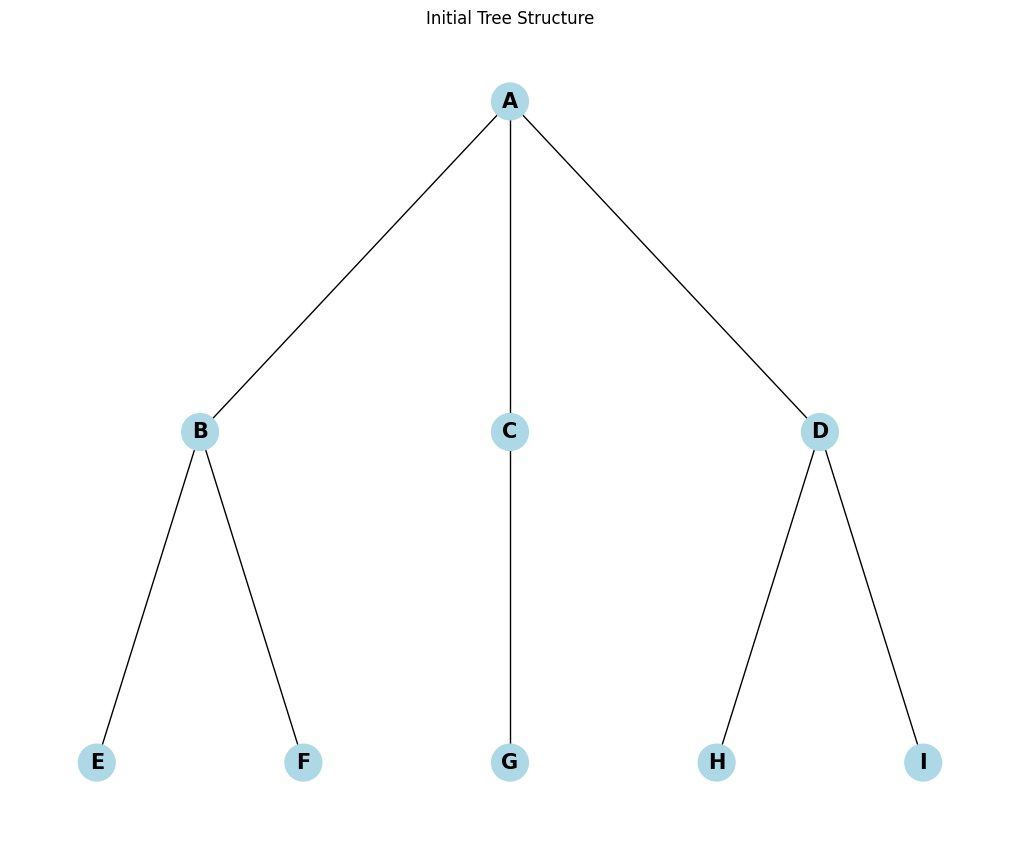

In [5]:
# Cell 6: Create the tree and visualize it
tree = create_tree()
visualize_tree(tree, title="Initial Tree Structure")

Running Depth-First Search (DFS) starting from node 'A':


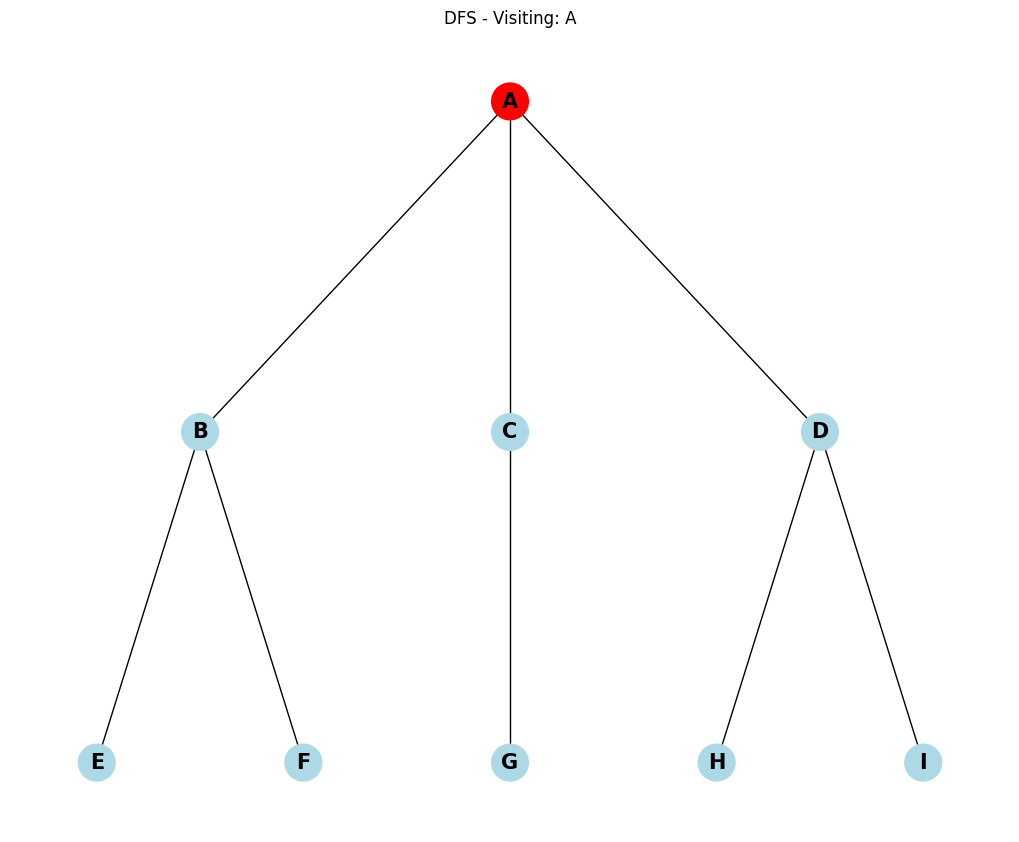

Visited: A


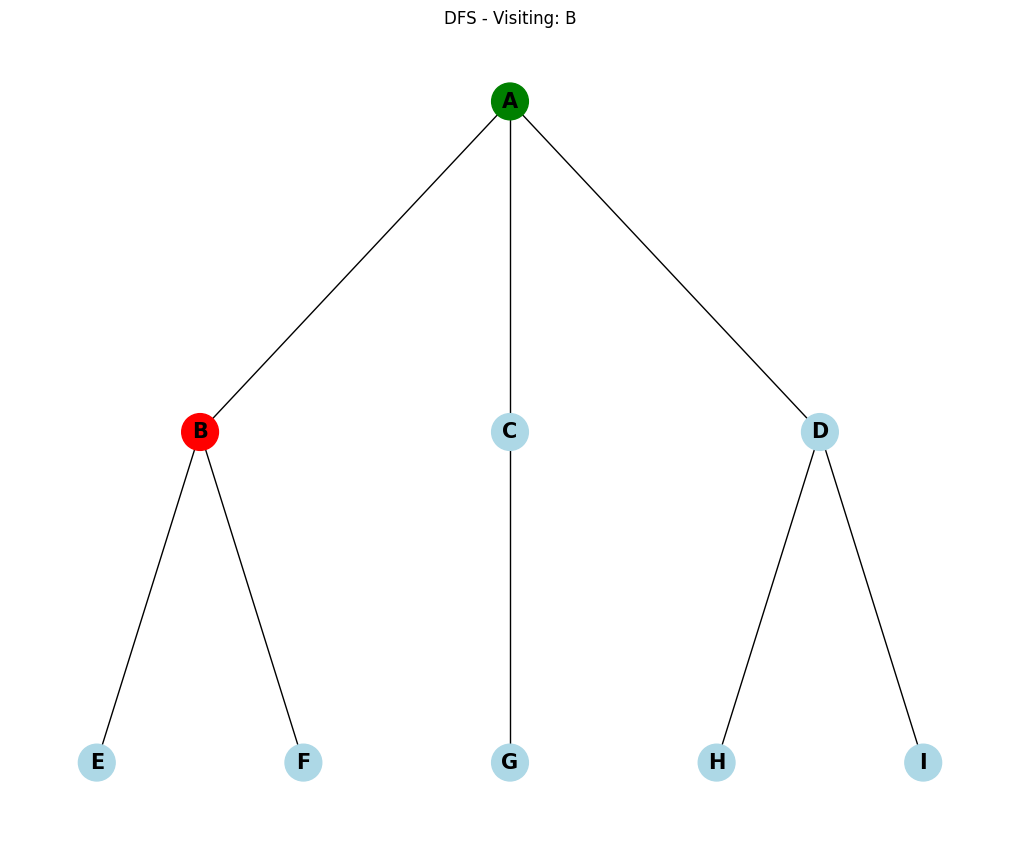

Visited: B


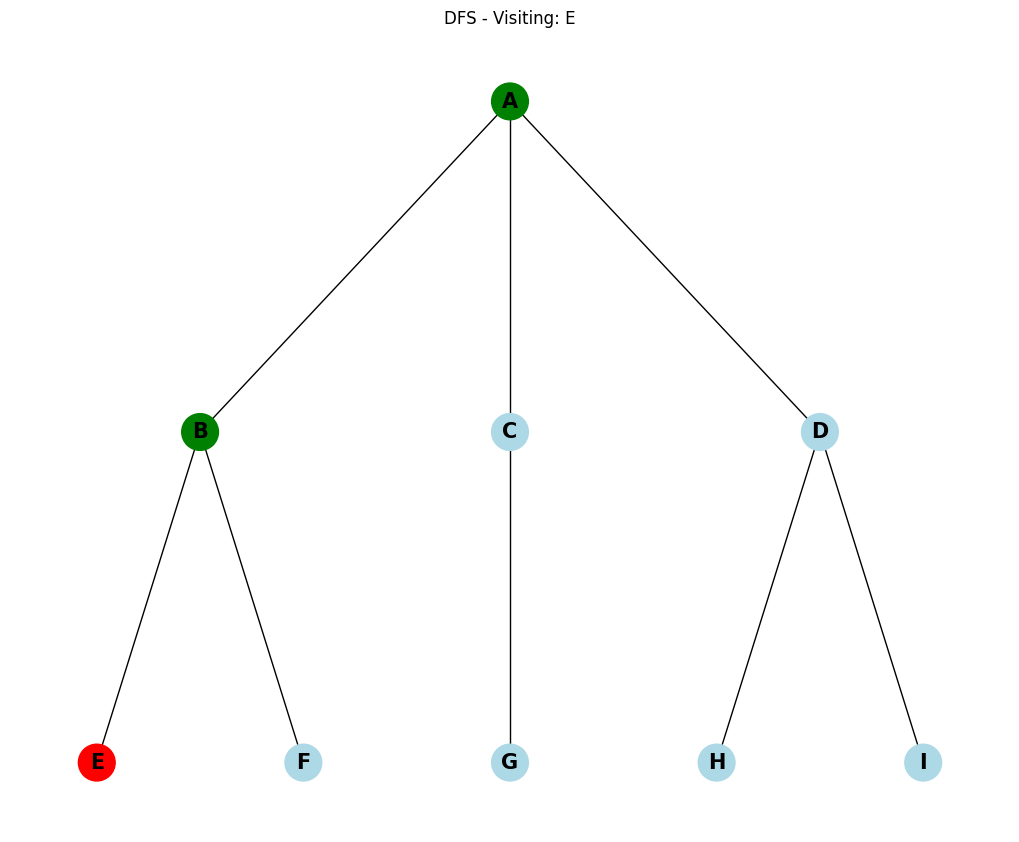

Visited: E


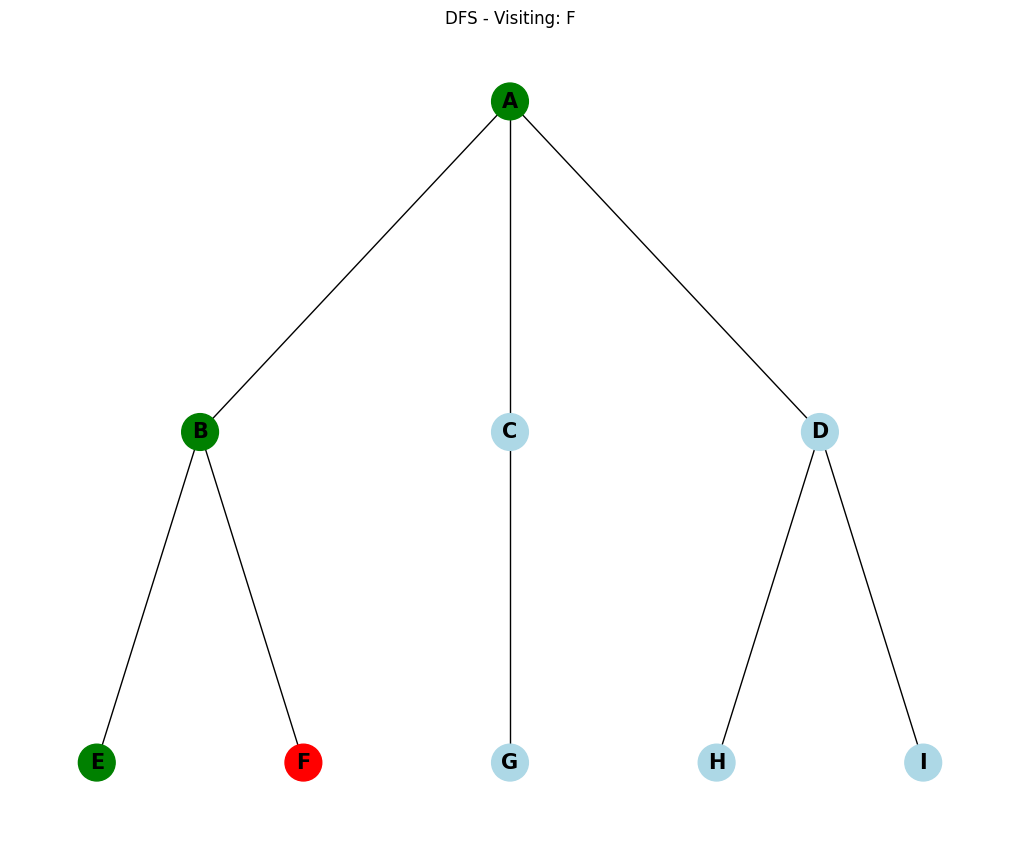

Visited: F


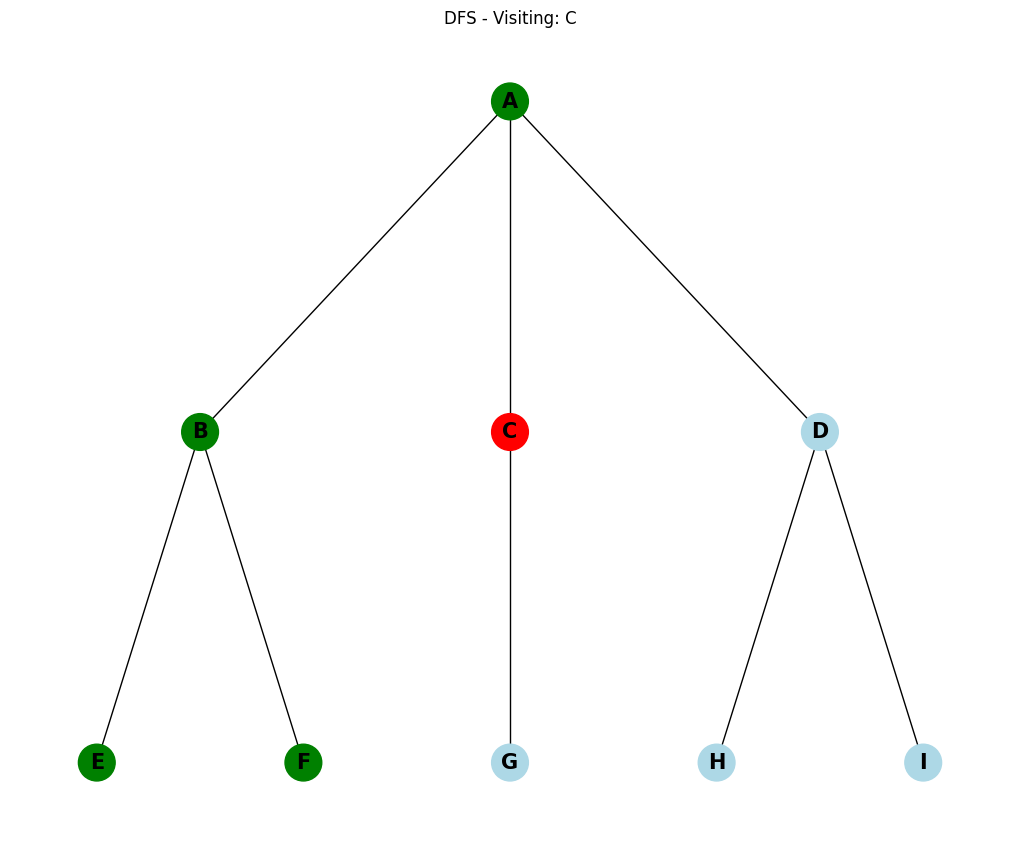

Visited: C


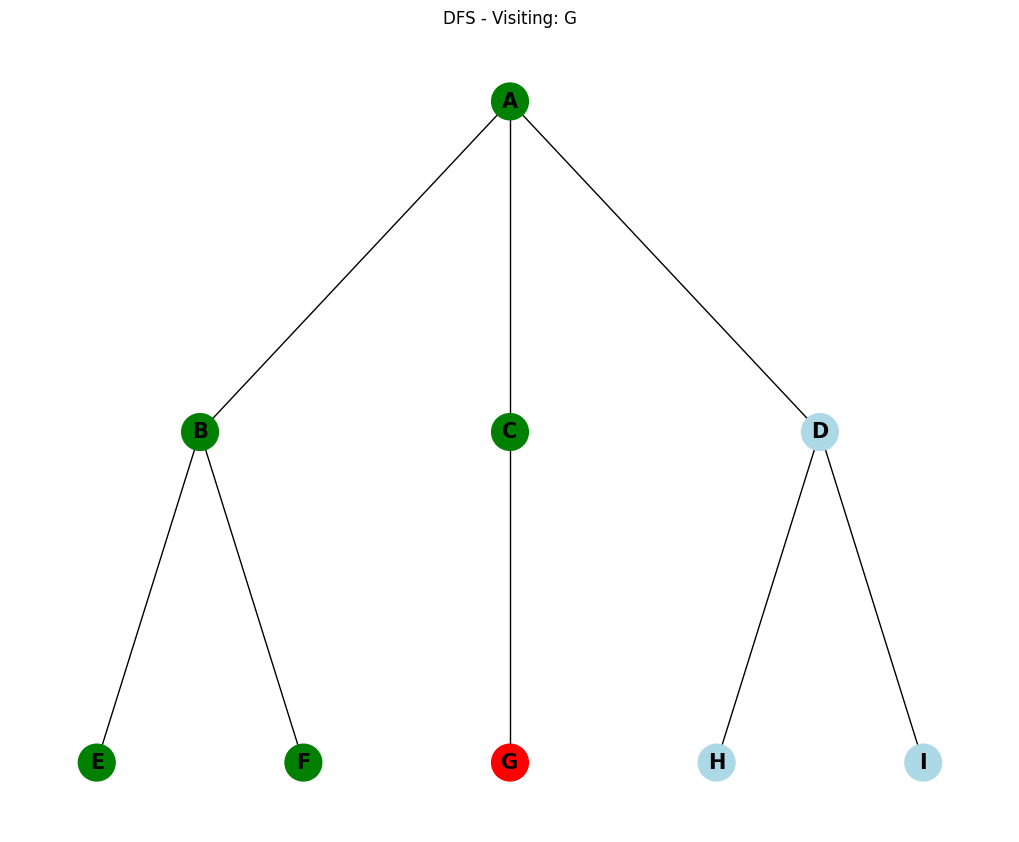

Visited: G


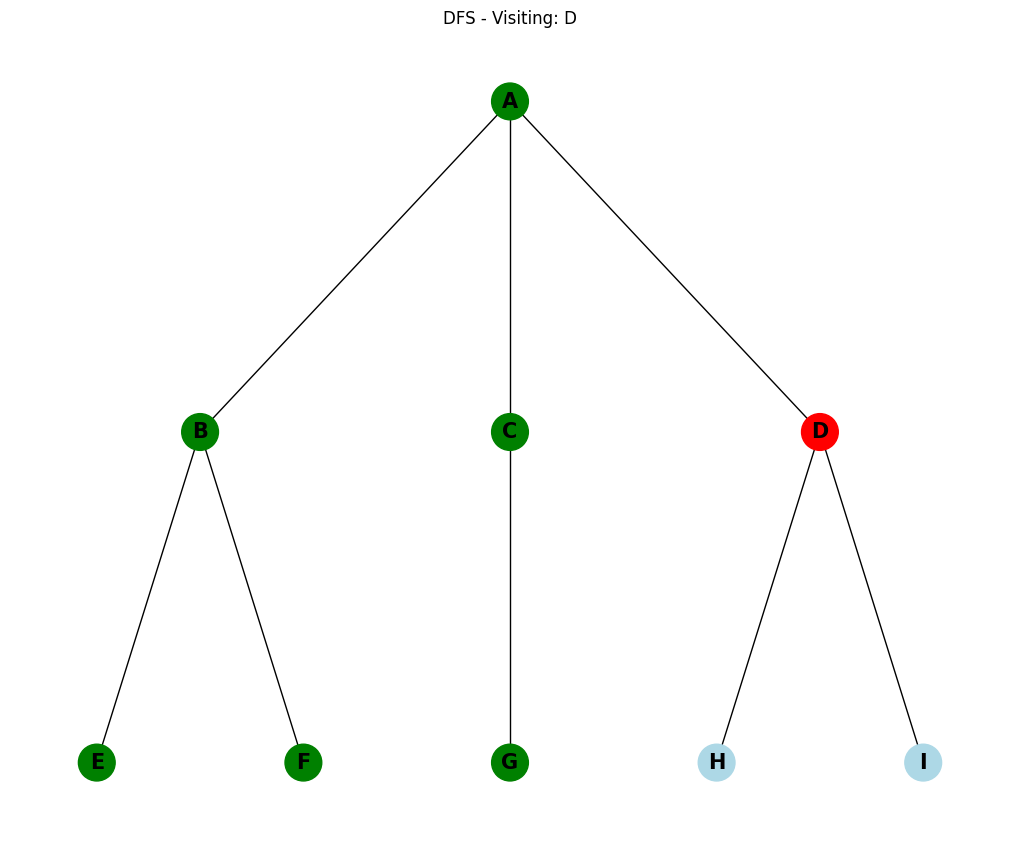

Visited: D


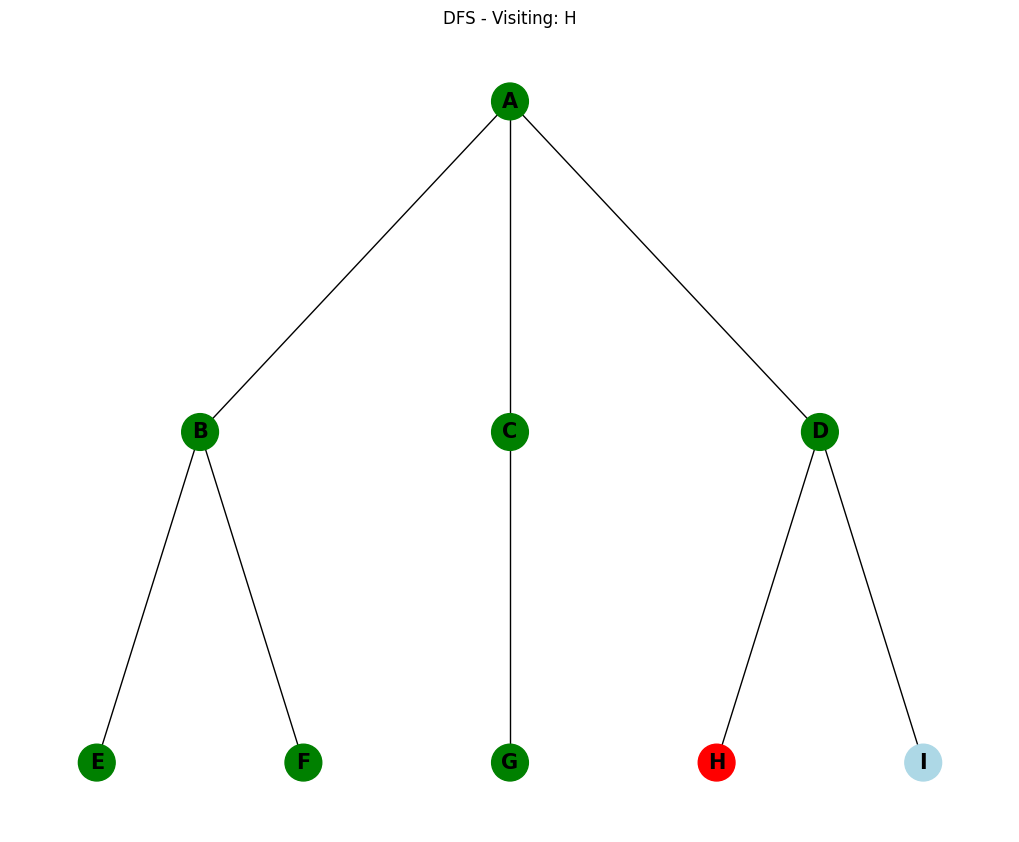

Visited: H


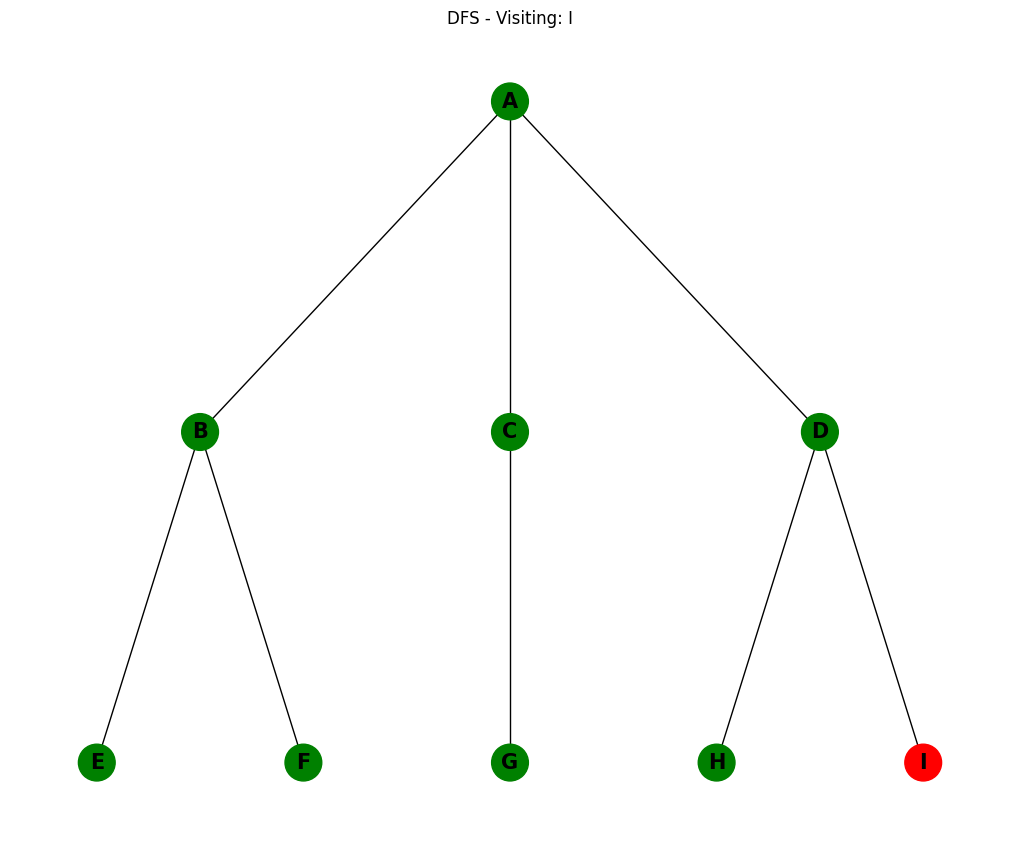

Visited: I

DFS traversal order: A -> B -> E -> F -> C -> G -> D -> H -> I


In [6]:
# Cell 7: Run DFS and show results
print("Running Depth-First Search (DFS) starting from node 'A':")
dfs_result = dfs_recursive(tree, 'A')
print(f"\nDFS traversal order: {' -> '.join(dfs_result)}")


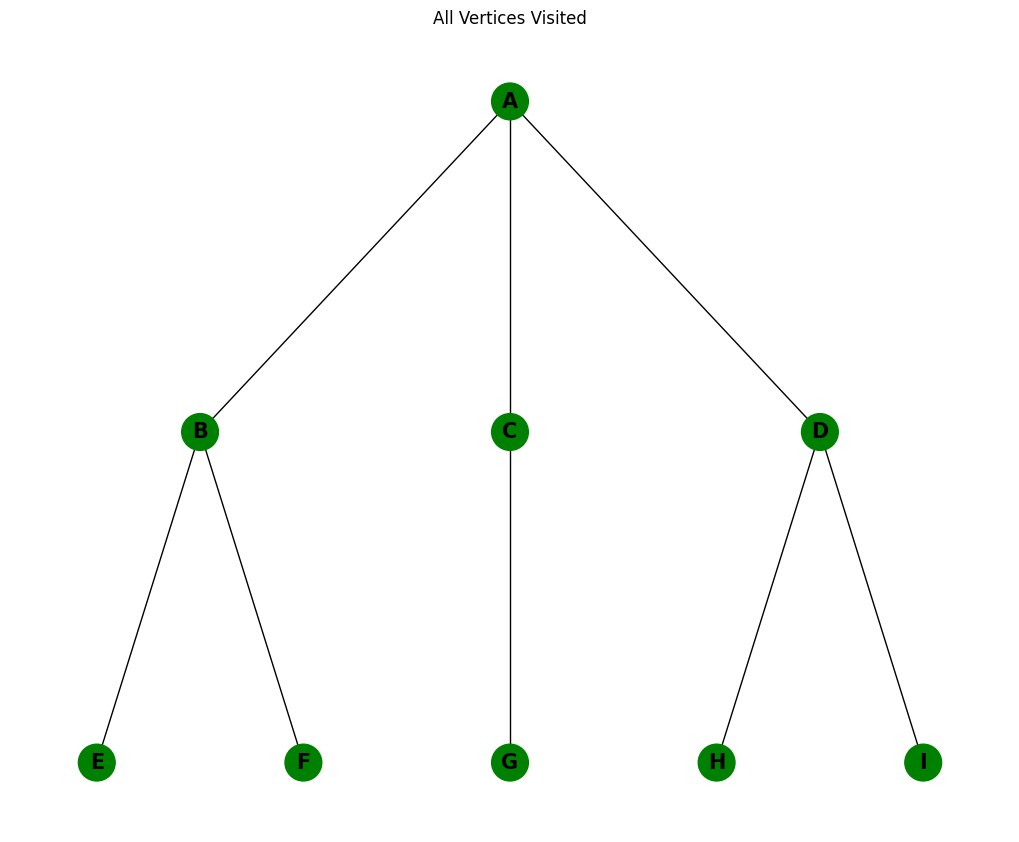

In [7]:
# Cell 10: Show final tree with all nodes visited
visualize_tree(tree, list(tree.keys()), title="All Vertices Visited")

# 1. Aim

To implement a recursive Depth-First Search (DFS) algorithm for traversing all vertices of an undirected graph or tree data structure, with visual representation of the traversal process.

# 2. Objectives

- Implement a recursive DFS algorithm for undirected graph traversal
- Create a visual representation of the graph/tree structure
- Visualize the step-by-step DFS traversal process with clear indication of visited and current nodes
- Track and display the complete traversal path
- Understand how DFS explores vertices in an undirected graph
- Demonstrate the practical application of the DFS algorithm in graph theory

# 3. Expected Output

- Visual representation of the initial tree structure
- Step-by-step visualization of the DFS traversal with:
  - Current node highlighted in red
  - Previously visited nodes highlighted in green
  - Unvisited nodes shown in light blue
- Console output showing the order of visited nodes
- Final DFS traversal path displayed as a sequence of connected vertices
- Final visualization showing all vertices visited

# 4. Software and Hardware Requirements

**Software Requirements:**
- Python 3.6 or higher
- Required Python packages:
  - matplotlib (for visualization)
  - networkx (for graph representation)
  - collections (for deque data structure)
- Jupyter Notebook or similar Python environment for cell-based execution

**Hardware Requirements:**
- Computer with minimum 4GB RAM
- 2GHz dual-core processor or equivalent
- Basic graphics capability for visualization
- At least 100MB of free disk space
- Display resolution of 1280x720 or higher recommended for proper visualization

# 5. Prerequisites

- Basic understanding of graph theory concepts:
  - Vertices/nodes and edges
  - Undirected graphs and tree structures
  - Graph traversal algorithms
- Knowledge of fundamental data structures:
  - Dictionaries/adjacency lists
  - Lists and arrays
  - Recursion and stack operations
- Python programming skills:
  - Recursive function implementation
  - Working with collections (lists, dictionaries)
  - Basic understanding of visualization libraries
- Understanding of algorithmic complexity and runtime analysis

# 6. Theory

## a. Necessary Definitions and Explanations

**Graph**: A collection of vertices (or nodes) connected by edges. In an undirected graph, edges have no direction, meaning if vertex A is connected to vertex B, then vertex B is also connected to vertex A.

**Tree**: A special case of a graph that is connected and acyclic (no cycles). It has exactly one path between any two vertices.

**Adjacency List**: A representation of a graph where each vertex is associated with a list of its adjacent vertices. In the provided code, this is implemented as a Python dictionary.

**Depth-First Search (DFS)**: A graph traversal algorithm that explores as far as possible along each branch before backtracking. The algorithm starts at a designated node and explores as deeply as possible along each path before backing up.

**Recursive Implementation**: An approach where the function calls itself with modified parameters until a base condition is met. In DFS, recursion naturally models the exploration and backtracking process.

**Graph Traversal**: The process of visiting all the vertices of a graph in a systematic way.

## b. Computation

**Time Complexity**:
- O(V + E) where V is the number of vertices and E is the number of edges in the graph
- Each vertex is processed exactly once: O(V)
- Each edge is considered exactly once in an undirected graph: O(E)

**Space Complexity**:
- O(V) for storing the visited list
- O(H) for the recursion stack, where H is the height of the recursion tree (in worst case, H can be V)
- Total: O(V) space complexity

## c. Algorithms

**DFS Algorithm (Recursive)**:

1. Create a function `dfs_recursive(graph, start, visited=None)`:
   
2. If `visited` is None, initialize it as an empty list

3. Mark the current vertex (`start`) as visited by adding it to the `visited` list

4. For each adjacent vertex (`neighbor`) of the current vertex:
   - If the neighbor has not been visited:
     - Recursively call `dfs_recursive(graph, neighbor, visited)`

5. Return the `visited` list containing all vertices in the traversal order

**Pseudocode**:
```
function DFS(graph, start_vertex, visited = []):
    add start_vertex to visited
    
    for each neighbor in graph[start_vertex]:
        if neighbor is not in visited:
            DFS(graph, neighbor, visited)
    
    return visited
```

## d. Example

Consider the tree structure from the provided code:

```
       A
     / | \
    B  C  D
   / \  |  / \
  E   F G  H  I
```

When DFS is initiated from vertex 'A', the traversal follows this pattern:

1. Start at 'A', mark it as visited
2. Move to the first neighbor of 'A', which is 'B'
3. Mark 'B' as visited
4. Move to the first neighbor of 'B' (excluding 'A' which is already visited), which is 'E'
5. Mark 'E' as visited
6. As 'E' has no unvisited neighbors, backtrack to 'B'
7. Move to the next unvisited neighbor of 'B', which is 'F'
8. Mark 'F' as visited
9. As 'F' has no unvisited neighbors, backtrack to 'B'
10. As 'B' has no more unvisited neighbors, backtrack to 'A'
11. Move to the next unvisited neighbor of 'A', which is 'C'
12. Continue this process until all vertices are visited

The resulting traversal order would be: A → B → E → F → C → G → D → H → I

## e. Applications

**Depth-First Search Applications**:

1. **Path Finding**: Finding paths between two vertices in a graph
2. **Topological Sorting**: Ordering vertices of a directed acyclic graph based on dependencies
3. **Cycle Detection**: Determining if a graph contains a cycle
4. **Connected Components**: Finding all connected components in an undirected graph
5. **Maze Generation and Solving**: Creating and solving mazes
6. **Web Crawling**: Exploring interconnected web pages
7. **Solving Puzzles**: Like Sudoku or crossword puzzles
8. **Artificial Intelligence**: Used in game trees for games like chess or tic-tac-toe
9. **Network Analysis**: Discovering network topology or analyzing relationships
10. **Garbage Collection**: Used in programming language runtime environments for identifying unreachable objects

# 7. Conclusion

The recursive Depth-First Search algorithm presented in this implementation provides an efficient method for traversing all vertices of an undirected graph. The algorithm demonstrates the fundamental concept of exploring as deeply as possible along each branch before backtracking, which is the defining characteristic of DFS.

The visual representation generated during each step of the traversal offers valuable insight into how DFS works, making it an excellent educational tool. The color-coding scheme (red for current node, green for visited nodes, and light blue for unvisited nodes) makes it easy to track the progress of the algorithm.

This implementation showcases the elegance of recursion in solving graph traversal problems. The recursive approach naturally mirrors the stack-based exploration pattern of DFS, where the function call stack implicitly manages the backtracking process.

While DFS is just one of several graph traversal algorithms, it is particularly useful for problems where complete exploration of paths is required before making decisions. The O(V + E) time complexity makes it efficient for most practical applications, although the space complexity due to recursion can be a limiting factor for very deep graphs.

This implementation successfully achieves the aim of developing a recursive algorithm for searching all vertices of an undirected graph, with the added benefit of visual representation to enhance understanding of the traversal process.